In [1]:
%matplotlib inline 
from interval import interval
import matplotlib.pyplot as plt
from sympy import(
    init_printing,
    var,
    exp,
    cos,
    sin,
)
init_printing()


from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)

In [2]:
args = var("x_1 x_2")
X = ip([[interval[-2, 2.2]],[interval[-2, 2.2]]])

-0.599274726933

## tmp_min_sup = infの時

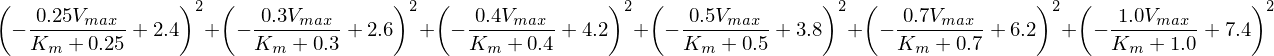

In [3]:
S_v_list = [
    [0.25, 2.4],
    [0.30, 2.6],
    [0.40, 4.2],
    [0.50, 3.8],
    [0.70, 6.2],
    [1.00, 7.4],
]


V_max, K_m = var("V_max K_m")
f_expr = 0

for S, v in S_v_list:
    f_expr += (v - V_max * S / (K_m + S)) ** 2
    

f_expr

Loop end. cnt:318, len(S):0, len(T):5, len(U):0

318
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT -----------
[[[interval([-0.018041642747710165, 0.01809424063837388])],
  [interval([-1.5718582575133049, -1.5697235845691293])]],
 [[interval([-1.8625464484394494, -1.8329809140799125])],
  [interval([-1.5782200416318668, -1.5634844803213348])]],
 [[interval([-0.5548350627737365, -0.5543086276419789])],
  [interval([-1.5708304517082272, -1.5707625622867625])]],
 [[interval([-0.5558682847870527, -0.5532763167290693])],
  [interval([-1.5708828353408548, -1.570710778639261])]],
 [[interval([0.8558532700639142, 0.8582934999731249])],
  [interval([1.5658680126949531, 1.57536630017288])]]]
Start saveing images in image/20171220_175010 dirctory.


KeyboardInterrupt: 

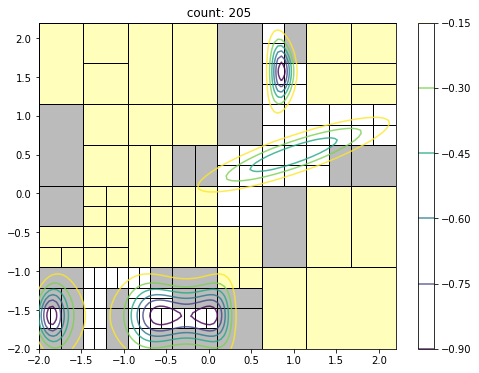

In [4]:
f_expr = -(0.6*exp(-4*(x_1-2*x_2)**2 - 6*(x_2-0.5)**2) + exp(-7*(cos(2*x_1) - (x_1 - sin(x_2)))**2 - 9*(0.9*cos(x_2))**2))


# plot3D(f_expr, args, X)
get_global_minima_from_f_expr(f_expr, args, X)




## tmp_min_sup = nelder-meadの局所最小値

In [5]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [6]:
f(X)

In [ ]:
krawczyk = Krawczyk(df, ddf, X)
_1, _2, _3, _4, animation_box = krawczyk.find_global_minimum(f, tmp_min_sup=-0.599274726933 ,trace=False, cnt_max=500)
visualize_optimization_log(krawczyk, f, animation_box)